<a href="https://colab.research.google.com/github/drshahizan/learn-cloud/blob/main/zkri/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Black Friday Dataset EDA and Feature Engineering
### Cleaning and preparing the data for model training

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [46]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [47]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Merge both train and test

In [48]:
df= df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [49]:
df_test.shape

(233599, 11)

In [50]:
df_train.shape, df.shape

((248463, 12), (482062, 12))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482062 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     482062 non-null  int64  
 1   Product_ID                  482062 non-null  object 
 2   Gender                      482062 non-null  object 
 3   Age                         482062 non-null  object 
 4   Occupation                  482062 non-null  int64  
 5   City_Category               482062 non-null  object 
 6   Stay_In_Current_City_Years  482062 non-null  object 
 7   Marital_Status              482062 non-null  int64  
 8   Product_Category_1          482062 non-null  int64  
 9   Product_Category_2          332658 non-null  float64
 10  Product_Category_3          147004 non-null  float64
 11  Purchase                    248462 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 47.8+ MB


In [52]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.820620e+05,482062.000000,482062.000000,482062.000000,332658.000000,147004.000000,248462.000000
mean,1.002971e+06,8.081328,0.410115,5.285148,9.849371,12.662499,9313.160226
std,1.735103e+03,6.529683,0.491855,3.740188,5.090222,4.127237,4968.201777
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001449e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5862.000000
50%,1.002986e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8058.000000
75%,1.004439e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [53]:
df.drop(['User_ID'],axis = 1, inplace=True)

In [54]:
## handling Gender
df['Gender']=df['Gender'].map({'F':0, 'M':1})

In [55]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [56]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4,'46-50':5, '51-55':6, '55+':7 })

In [57]:
## second technique
'''
from sklearn import preprocessing

label_encoder = preprocessing.label_encoder()
df['Age'] = label_encoder.fit_transformation(df['Age'])
df['Age'].unique()

'''

"\nfrom sklearn import preprocessing\n\nlabel_encoder = preprocessing.label_encoder()\ndf['Age'] = label_encoder.fit_transformation(df['Age'])\ndf['Age'].unique()\n\n"

In [58]:
df_city=pd.get_dummies(df['City_Category'], drop_first=True)

In [59]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [60]:
df = pd.concat([df,df_city], axis=1)


In [61]:
df.drop('City_Category',axis=1, inplace=True)

### Missing Values

In [62]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            149404
Product_Category_3            335058
Purchase                      233600
B                                  0
C                                  0
dtype: int64

#### focus on replacing missing values

In [63]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [83]:
##  Replace the missing values with mode

df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [82]:
df['Product_Category_3']= df['Product_Category_3'].fillna(df['Product_Category_3']).mode()[0]

In [84]:
df['Product_Category_3'].isnull().sum()

0

In [67]:
df.shape

(482062, 12)

In [68]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [69]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-69-7d6a3c4db74c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [70]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,8.0,16.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [71]:
## Convert object to Int
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482062 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  482062 non-null  object 
 1   Gender                      482062 non-null  int64  
 2   Age                         482062 non-null  int64  
 3   Occupation                  482062 non-null  int64  
 4   Stay_In_Current_City_Years  482062 non-null  int64  
 5   Marital_Status              482062 non-null  int64  
 6   Product_Category_1          482062 non-null  int64  
 7   Product_Category_2          482062 non-null  float64
 8   Product_Category_3          482062 non-null  float64
 9   Purchase                    248462 non-null  float64
 10  B                           482062 non-null  uint8  
 11  C                           482062 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 41.4+ MB


In [73]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

### Visualisation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


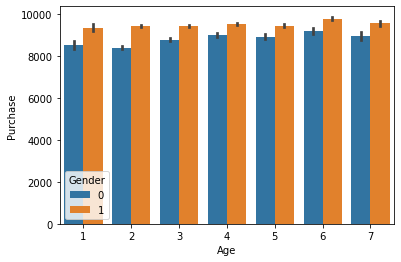

In [76]:
sns.barplot('Age','Purchase', hue= 'Gender', data=df)

* Purchasing of men is high then women

### Vis of purchase with occupation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


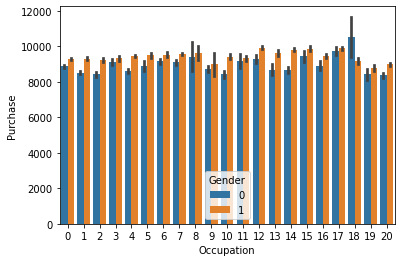

In [77]:
sns.barplot('Occupation','Purchase', hue= 'Gender', data=df)

* 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


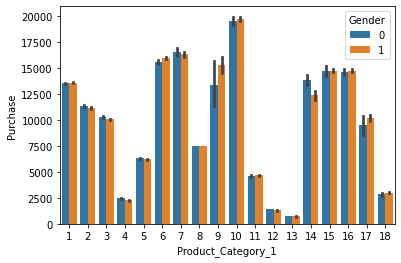

In [78]:
sns.barplot('Product_Category_1','Purchase', hue= 'Gender', data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


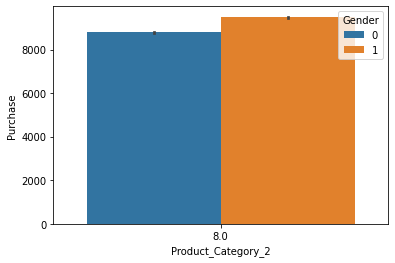

In [85]:
sns.barplot('Product_Category_2','Purchase', hue= 'Gender', data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


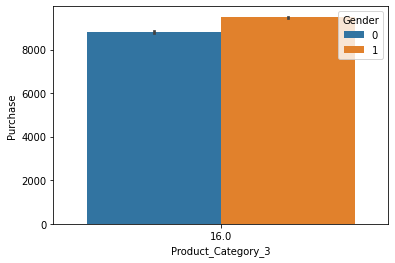

In [86]:
sns.barplot('Product_Category_3','Purchase', hue= 'Gender', data=df)

### Feature Scaling

In [92]:
df_test=df[df['Purchase'].isnull()]

In [93]:
df_train=df[df['Purchase'].isnull()]

In [97]:
X = df_[:-1]
y = df_train['Purchase']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df